In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking-small.csv")
parkingdata.shape

(999, 13)

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,Victoria Market,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7021S,24/08/2012 11:34:36 AM,24/08/2012 12:49:09 PM,4473,LZ 15M M-SAT 7:30-19:30,1,1346,3770
1,Courtney,PEEL STREET,O'CONNELL STREET,QUEENSBERRY STREET,2,5398E,17/03/2012 01:07:59 PM,17/03/2012 01:10:06 PM,127,1/2P A RPE M-SUN 7:30-23:00,0,1101,3472
2,Victoria Market,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6624,17/02/2012 01:54:34 PM,17/02/2012 02:20:17 PM,1543,2P MTR M-SAT 7:30-20:30,0,681,2805
3,Chinatown,LONSDALE STREET,SWANSTON STREET,RUSSELL STREET,3,2888N,27/11/2011 03:03:19 PM,27/11/2011 04:02:41 PM,3562,1P SUN 7:30-18:30,0,894,1770
4,Southbank,GRANT STREET,WELLS STREET,ST KILDA ROAD,3,9870N,21/04/2012 03:08:32 PM,21/04/2012 05:06:00 PM,7048,2P TKT A M-SAT 7:30-18:30,0,728,4584


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
994,Princes Theatre,SPRING STREET,LONSDALE STREET,Lt BOURKE STREET,5,65W,27/08/2012 05:42:47 PM,27/08/2012 05:45:01 PM,134,LZ 15M M-SUN 7:30-19:30,0,1288,6986
995,Hardware,LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,1,C2912,04/04/2012 01:52:51 PM,04/04/2012 02:22:32 PM,1781,1P MTR M-SAT 7:30-19:30,0,894,1941
996,Magistrates,LA TROBE STREET,KING STREET,WILLIAM STREET,4,3891S,14/09/2012 04:59:28 PM,14/09/2012 05:03:19 PM,231,2P TKT A M-SAT 7:30-20:30,0,856,2157
997,Regency,RUSSELL STREET,LA TROBE STREET,Lt LONSDALE STREET,5,899W,02/11/2011 05:40:34 PM,02/11/2011 08:30:00 PM,10166,3P MTR M-SAT 7:30-20:30,0,1221,468
998,Magistrates,SPENCER STREET,Lt LONSDALE STREET,LONSDALE STREET,5,1555W,22/05/2012 01:24:35 PM,22/05/2012 02:14:08 PM,2973,2P TKT A M-F 9:30-16:00,0,1285,951


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        107
Regency             75
Titles              69
Princes Theatre     67
The Mac             66
Victoria Market     63
Southbank           58
Hyatt               50
Chinatown           49
Hardware            47
Spencer             42
Rialto              39
Courtney            39
County              38
City Square         36
Magistrates         36
RACV                34
Banks               32
Supreme             21
Jolimont            20
Tavistock            7
Docklands            3
West Melbourne       1
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7021S,24/08/2012 11:34:36 AM,24/08/2012 12:49:09 PM,4473,LZ 15M M-SAT 7:30-19:30,1,1346,3770
1,COURTNEY,PEEL STREET,O'CONNELL STREET,QUEENSBERRY STREET,2,5398E,17/03/2012 01:07:59 PM,17/03/2012 01:10:06 PM,127,1/2P A RPE M-SUN 7:30-23:00,0,1101,3472
2,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6624,17/02/2012 01:54:34 PM,17/02/2012 02:20:17 PM,1543,2P MTR M-SAT 7:30-20:30,0,681,2805
3,CHINATOWN,LONSDALE STREET,SWANSTON STREET,RUSSELL STREET,3,2888N,27/11/2011 03:03:19 PM,27/11/2011 04:02:41 PM,3562,1P SUN 7:30-18:30,0,894,1770
4,SOUTHBANK,GRANT STREET,WELLS STREET,ST KILDA ROAD,3,9870N,21/04/2012 03:08:32 PM,21/04/2012 05:06:00 PM,7048,2P TKT A M-SAT 7:30-18:30,0,728,4584


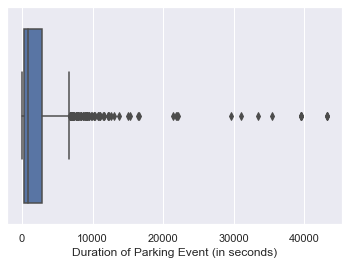

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])


In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             97
QUEEN STREET                73
LA TROBE STREET             62
RUSSELL STREET              58
FRANKLIN STREET             52
COLLINS STREET              52
BOURKE STREET               47
EXHIBITION STREET           47
ELIZABETH STREET            47
SPRING STREET               41
LT LONSDALE STREET          37
LT COLLINS STREET           29
ERROL STREET                24
WILLIAM STREET              21
FLINDERS LANE               20
KING STREET                 18
LT BOURKE STREET            18
THERRY STREET               17
QUEENSBERRY STREET          17
SPENCER STREET              15
A'BECKETT STREET            14
COVENTRY STREET             14
VICTORIA STREET             13
FLINDERS STREET             11
O'CONNELL STREET            11
CAPEL STREET                 9
SOUTHBANK BOULEVARD          8
COBDEN STREET                7
DORCAS STREET                7
ALBERT STREET                7
WALSH STREET                 7
KAVANAGH STREET              6
LEVESON 

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

QUEEN STREET           103
KING STREET             92
WILLIAM STREET          65
QUEENSBERRY STREET      62
RUSSELL STREET          57
SPENCER STREET          53
LT LONSDALE STREET      53
SWANSTON STREET         45
LONSDALE STREET         42
EXHIBITION STREET       36
LT COLLINS STREET       33
VICTORIA STREET         29
LT BOURKE STREET        28
BOURKE STREET           23
LA TROBE STREET         22
ELIZABETH STREET        22
COLLINS STREET          21
FLINDERS LANE           19
A'BECKETT STREET        18
ERROL STREET            13
WILLAM STREET           13
FRANKLIN STREET         12
WELLS STREET            11
FLINDERS STREET         10
O'CONNELL STREET         9
COBDEN STREET            8
DODDS STREET             8
STURT STREET             7
HOWARD STREET            7
SOUTHBANK BOULEVARD      6
VICTORIA PARADE          6
THERRY STREET            6
BALSTON STREET           6
KINGS WAY                5
ALBERT STREET            5
PEEL STREET              5
CITY ROAD                5
S

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

ELIZABETH STREET      104
VICTORIA STREET        86
WILLIAM STREET         79
QUEEN STREET           78
EXHIBITION STREET      56
LONSDALE STREET        54
KING STREET            53
LT BOURKE STREET       42
SPRING STREET          36
RUSSELL STREET         35
COLLINS STREET         33
FLINDERS LANE          31
LA TROBE STREET        30
BOURKE STREET          28
LT LONSDALE STREET     27
LT COLLINS STREET      23
SWANSTON STREET        22
FLINDERS STREET        19
LEVESON STREET         13
DODDS STREET           13
ST KILDA ROAD          11
WALSH STREET           10
HAWKE STREET            8
QUEENSBERRY STREET      8
KAVANAGH STREET         8
POWER STREET            7
MILTON STREET           7
A'BECKETT STREET        7
CAPEL STREET            6
LANSDOWNE STREET        6
FRANKLIN STREET         6
THERRY STREET           6
MILES STREET            5
CATHEDRAL PLACE         5
WELLS STREET            5
DORCAS STREET           3
STURT STREET            3
EADES STREET            3
SPENCER STRE

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7021S,2012-08-24 11:34:36,2012-08-24 12:49:09,4473,LZ 15M M-SAT 7:30-19:30,1,1346,3770
1,COURTNEY,PEEL STREET,O'CONNELL STREET,QUEENSBERRY STREET,2,5398E,2012-03-17 13:07:59,2012-03-17 13:10:06,127,1/2P A RPE M-SUN 7:30-23:00,0,1101,3472
2,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6624,2012-02-17 13:54:34,2012-02-17 14:20:17,1543,2P MTR M-SAT 7:30-20:30,0,681,2805
3,CHINATOWN,LONSDALE STREET,SWANSTON STREET,RUSSELL STREET,3,2888N,2011-11-27 15:03:19,2011-11-27 16:02:41,3562,1P SUN 7:30-18:30,0,894,1770
4,SOUTHBANK,GRANT STREET,WELLS STREET,ST KILDA ROAD,3,9870N,2012-04-21 15:08:32,2012-04-21 17:06:00,7048,2P TKT A M-SAT 7:30-18:30,0,728,4584


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
994,PRINCES THEATRE,SPRING STREET,LONSDALE STREET,LT BOURKE STREET,5,65W,2012-08-27 17:42:47,2012-08-27 17:45:01,134,LZ 15M M-SUN 7:30-19:30,0,1288,6986
995,HARDWARE,LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,1,C2912,2012-04-04 13:52:51,2012-04-04 14:22:32,1781,1P MTR M-SAT 7:30-19:30,0,894,1941
996,MAGISTRATES,LA TROBE STREET,KING STREET,WILLIAM STREET,4,3891S,2012-09-14 16:59:28,2012-09-14 17:03:19,231,2P TKT A M-SAT 7:30-20:30,0,856,2157
997,REGENCY,RUSSELL STREET,LA TROBE STREET,LT LONSDALE STREET,5,899W,2011-02-11 17:40:34,2011-02-11 20:30:00,10166,3P MTR M-SAT 7:30-20:30,0,1221,468
998,MAGISTRATES,SPENCER STREET,LT LONSDALE STREET,LONSDALE STREET,5,1555W,2012-05-22 13:24:35,2012-05-22 14:14:08,2973,2P TKT A M-F 9:30-16:00,0,1285,951


## Data Visualisation

In [19]:
def add_value_labels(ax, spacing=5):
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

### Most popular parking street in 4 hour interval

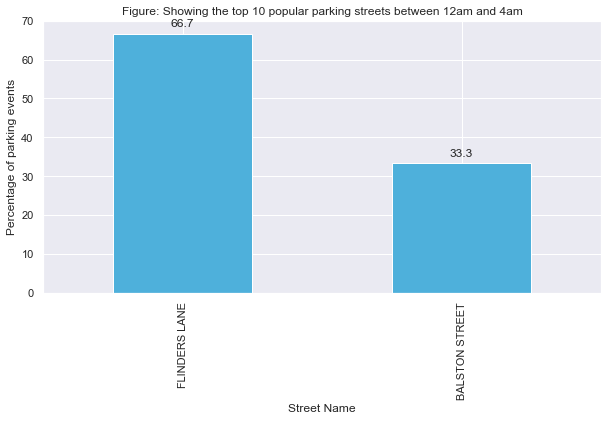

In [20]:
mask = (parkingdata['Arrival Time'].dt.hour >= 0) & (parkingdata['Arrival Time'].dt.hour <= 3)
between0and4 = parkingdata.loc[mask]
mostPopular = between0and4['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 12am and 4am')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

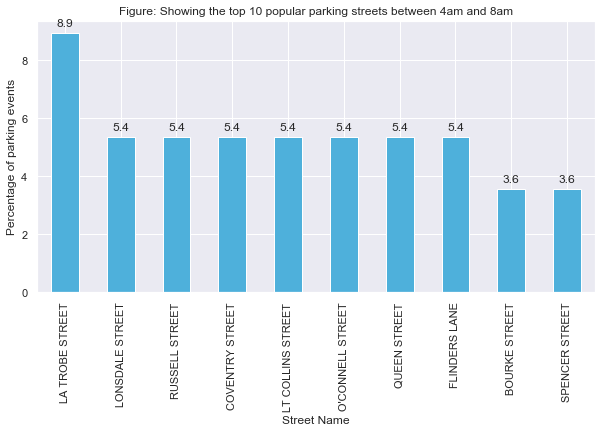

In [21]:
mask = (parkingdata['Arrival Time'].dt.hour >= 4) & (parkingdata['Arrival Time'].dt.hour <= 7)
between4and8 = parkingdata.loc[mask]
mostPopular = between4and8['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 4am and 8am')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

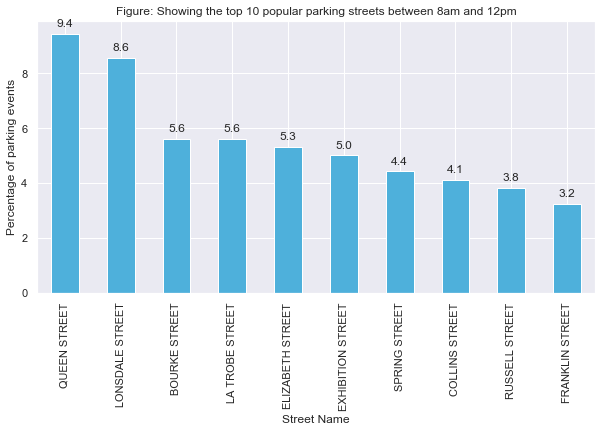

In [22]:
mask = (parkingdata['Arrival Time'].dt.hour >= 8) & (parkingdata['Arrival Time'].dt.hour <= 11)
between8and12 = parkingdata.loc[mask]
mostPopular = between8and12['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 8am and 12pm')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

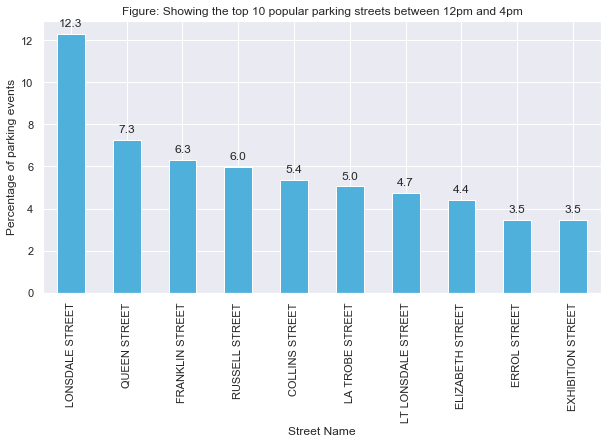

In [23]:
mask = (parkingdata['Arrival Time'].dt.hour >= 12) & (parkingdata['Arrival Time'].dt.hour <= 15)
between12and16 = parkingdata.loc[mask]
mostPopular = between12and16['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 12pm and 4pm')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

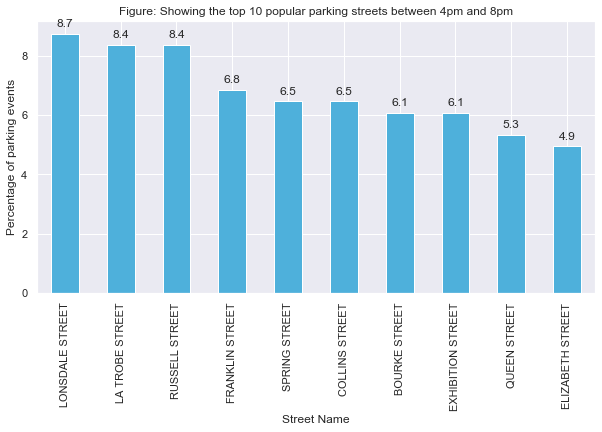

In [24]:
mask = (parkingdata['Arrival Time'].dt.hour >= 16) & (parkingdata['Arrival Time'].dt.hour <= 19)
between16and20 = parkingdata.loc[mask]
mostPopular = between16and20['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 4pm and 8pm')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

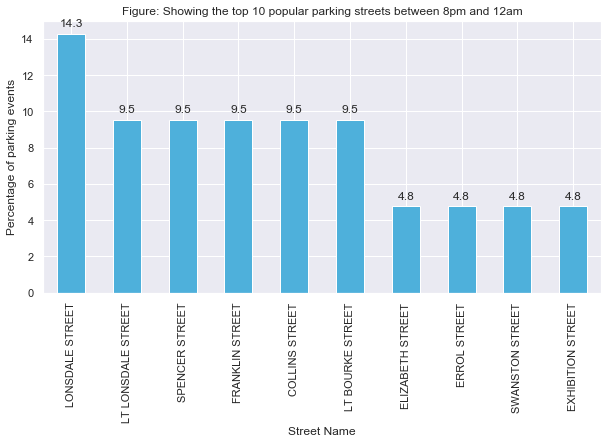

In [25]:
mask = (parkingdata['Arrival Time'].dt.hour >= 20) & (parkingdata['Arrival Time'].dt.hour <= 23)
between20and00 = parkingdata.loc[mask]
mostPopular = between20and00['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 8pm and 12am')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

### Most popular parking area in 4 hour interval

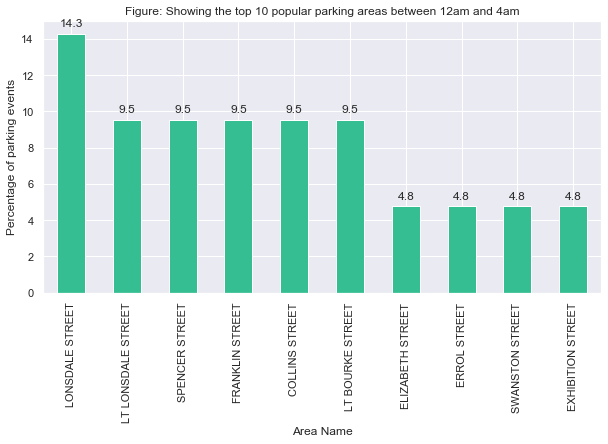

In [26]:
mask = (parkingdata['Arrival Time'].dt.hour >= 0) & (parkingdata['Arrival Time'].dt.hour <= 3)
between0and4 = parkingdata.loc[mask]
mostPopular = between0and4['Area Name'].value_counts(normalize=True)*100
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 12am and 4am')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

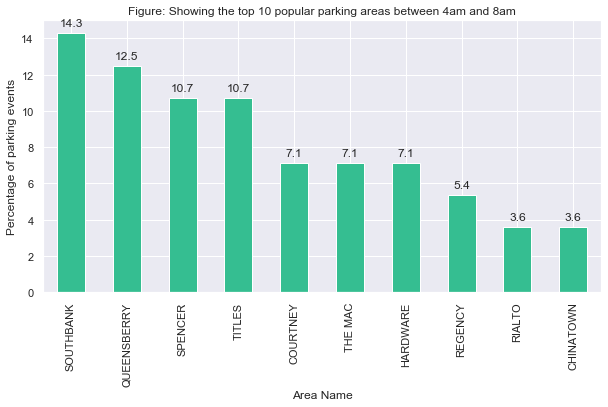

In [27]:
mask = (parkingdata['Arrival Time'].dt.hour >= 4) & (parkingdata['Arrival Time'].dt.hour <= 7)
between4and8 = parkingdata.loc[mask]
mostPopular = between4and8['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 4am and 8am')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

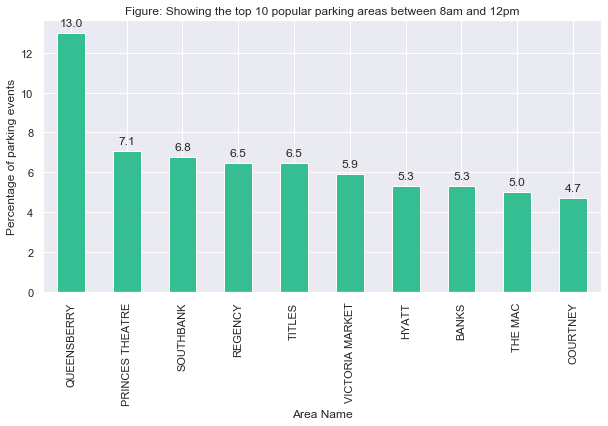

In [28]:
mask = (parkingdata['Arrival Time'].dt.hour >= 8) & (parkingdata['Arrival Time'].dt.hour <= 11)
between8and12 = parkingdata.loc[mask]
mostPopular = between8and12['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 8am and 12pm')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

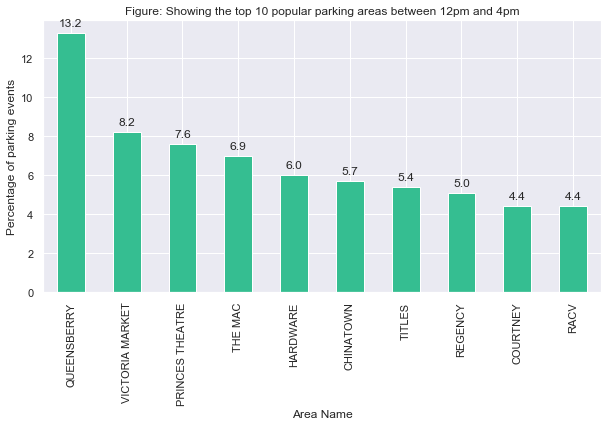

In [29]:
mask = (parkingdata['Arrival Time'].dt.hour >= 12) & (parkingdata['Arrival Time'].dt.hour <= 15)
between12and16 = parkingdata.loc[mask]
mostPopular = between12and16['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 12pm and 4pm')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

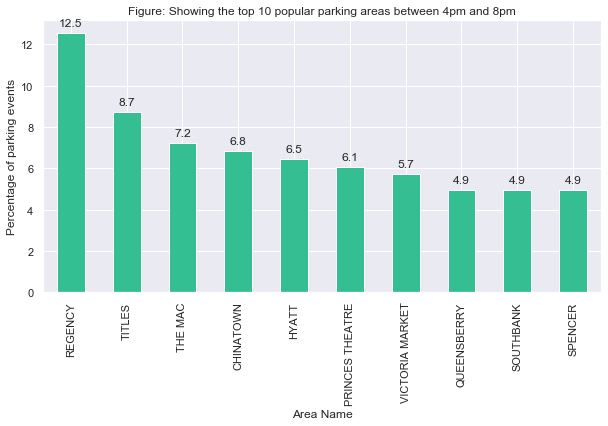

In [30]:
mask = (parkingdata['Arrival Time'].dt.hour >= 16) & (parkingdata['Arrival Time'].dt.hour <= 19)
between16and20 = parkingdata.loc[mask]
mostPopular = between16and20['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 4pm and 8pm')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

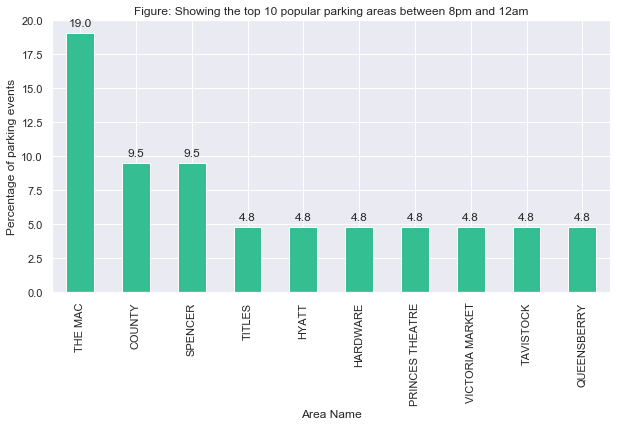

In [31]:
mask = (parkingdata['Arrival Time'].dt.hour >= 20) & (parkingdata['Arrival Time'].dt.hour <= 23)
between20and00 = parkingdata.loc[mask]
mostPopular = between20and00['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar',color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 8pm and 12am')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

### Frequency of violation by month (2011)

In [32]:
#Selecting only the rows which have infringement
onlyInfringe = parkingdata.loc[parkingdata['In Violation?'] == 1, :]
onlyInfringe.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7021S,2012-08-24 11:34:36,2012-08-24 12:49:09,4473,LZ 15M M-SAT 7:30-19:30,1,1346,3770
8,CITY SQUARE,FLINDERS STREET,SWANSTON STREET,RUSSELL STREET,3,1630N,2012-05-19 18:20:01,2012-05-19 19:19:58,3597,1/2P MTR SAT 7:30-1930,1,670,1123
10,CHINATOWN,RUSSELL STREET,LT BOURKE STREET,BOURKE STREET,2,770E,2012-02-25 18:30:31,2012-02-25 21:02:36,9125,2P DIS M-SUN 0:00-23:59,1,1221,504
11,PRINCES THEATRE,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,1,C2858,2011-11-17 09:00:00,2011-11-17 10:41:06,6066,1P MTR M-SAT 7:30-19:30,1,894,1996
13,CHINATOWN,LT COLLINS STREET,SWANSTON STREET,RUSSELL STREET,4,2189S,2012-01-29 12:26:29,2012-01-29 12:28:16,107,S/ NO STOP CCV M-SUN 0:00-23:59,1,911,1181
15,SOUTHBANK,COVENTRY STREET,DODDS STREET,WELLS STREET,4,9317S,2012-02-20 13:50:40,2012-02-20 16:33:33,9773,2P TKT A M-F 7:30-18:30,1,547,4054
23,QUEENSBERRY,QUEENSBERRY STREET,ERROL STREET,LEVESON STREET,4,7733S,2012-07-24 11:56:34,2012-07-24 15:10:10,11616,LZ 30M M-F 7:30-18:30,1,1175,4420
28,QUEENSBERRY,VICTORIA STREET,KING STREET,HAWKE STREET,3,7642N,2012-02-15 11:32:34,2012-02-15 12:09:35,2221,1/4P M-SAT 7:30-18:30,1,1381,4001
30,RIALTO,COLLINS STREET,KING STREET,WILLIAM STREET,3,2066N,2012-09-03 09:24:51,2012-09-03 10:45:41,4850,1/2P M-SAT 7:30-19:30,1,528,1290
45,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6628,2011-11-11 17:42:32,2011-11-11 19:50:44,7692,2P MTR M-SAT 7:30-20:30,1,681,2812


In [33]:
#Separating the month number from the Departure Time column for further analysis
onlyInfringe['Month Number'] = onlyInfringe['Departure Time'].dt.month
onlyInfringe['Month Number'].value_counts()

C:\Users\drago\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


10    20
11    17
9     15
5     15
7     12
2     12
4     11
8     10
3     10
1     10
6      8
12     6
Name: Month Number, dtype: int64

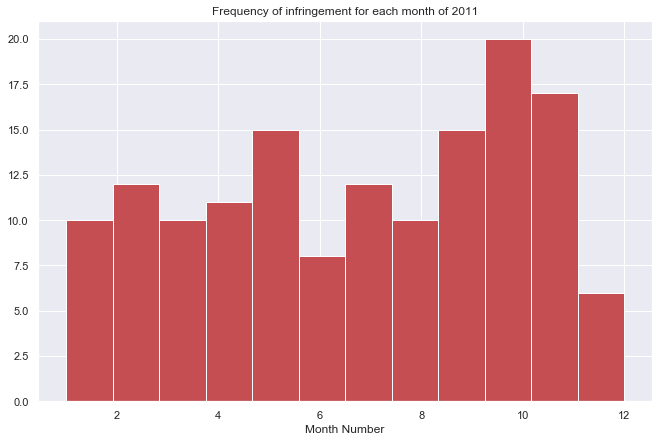

In [34]:
#Creating a histogram to show the frequency of infringement each month of the year 2011

plt.figure(figsize=(11,7))
_ = sns.distplot(onlyInfringe['Month Number'], kde = False, bins = 12, hist_kws = {"alpha": 1}, color = 'r')
_ = plt.title("Frequency of infringement for each month of 2011")

### Categories of P Type Parking Violations

In [35]:
#Checking all the values of Sign feature
onlyInfringe['Sign'].value_counts()

1P MTR M-SAT 7:30-19:30                  35
1/2P MTR M-SAT 7:30-19:30                15
1/2P M-SAT 7:30-19:30                     9
2P MTR M-SAT 7:30-20:30                   8
1P SUN 7:30-18:30                         4
2P MTR M-F 7:30-18:30                     4
2P MTR M-F 9:30-20:30                     3
P/ 5 M-SAT 7:30-19:30                     3
1/2P M-F 7:30-18:30                       3
1P TKT A M-F 7:30-18:30                   3
2P TKT A M-F 7:30-18:30                   3
2P SUN 7:30-18:30                         3
1/2P RPA M-SUN 7:30-18:30                 2
1/4P M-F 7:30-18:30                       2
1P MTR M-F 9:30-19:30                     2
CW TOW M-F 7:00-9:30                      2
1/4P M-SAT 7:30-18:30                     2
CW TOW M-F 7:30-9:30                      2
1P AOT M-SAT 19:30-23:59                  2
1/4P M-SAT 7:30-19:30                     2
1P MTR M-SAT 7:30-18:30                   2
LZ 30M M-F 7:30-18:30                     2
LZ 15M M-F 7:30-19:30           

In [36]:
#Creating a new dataframe containing only P based parking sign infringements
pSignInfringe = onlyInfringe.loc[onlyInfringe.Sign.str.contains("1P|1/2P|2P|4P|1/4P|P10|P/"), :]
pSignInfringe.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID,Month Number
8,CITY SQUARE,FLINDERS STREET,SWANSTON STREET,RUSSELL STREET,3,1630N,2012-05-19 18:20:01,2012-05-19 19:19:58,3597,1/2P MTR SAT 7:30-1930,1,670,1123,5
10,CHINATOWN,RUSSELL STREET,LT BOURKE STREET,BOURKE STREET,2,770E,2012-02-25 18:30:31,2012-02-25 21:02:36,9125,2P DIS M-SUN 0:00-23:59,1,1221,504,2
11,PRINCES THEATRE,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,1,C2858,2011-11-17 09:00:00,2011-11-17 10:41:06,6066,1P MTR M-SAT 7:30-19:30,1,894,1996,11
15,SOUTHBANK,COVENTRY STREET,DODDS STREET,WELLS STREET,4,9317S,2012-02-20 13:50:40,2012-02-20 16:33:33,9773,2P TKT A M-F 7:30-18:30,1,547,4054,2
28,QUEENSBERRY,VICTORIA STREET,KING STREET,HAWKE STREET,3,7642N,2012-02-15 11:32:34,2012-02-15 12:09:35,2221,1/4P M-SAT 7:30-18:30,1,1381,4001,2
30,RIALTO,COLLINS STREET,KING STREET,WILLIAM STREET,3,2066N,2012-09-03 09:24:51,2012-09-03 10:45:41,4850,1/2P M-SAT 7:30-19:30,1,528,1290,9
45,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6628,2011-11-11 17:42:32,2011-11-11 19:50:44,7692,2P MTR M-SAT 7:30-20:30,1,681,2812,11
53,HARDWARE,LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,1,C2942,2012-05-05 13:17:55,2012-05-05 14:59:35,6100,1P MTR M-SAT 7:30-19:30,1,894,2019,5
55,HYATT,EXHIBITION STREET,LT COLLINS STREET,COLLINS STREET,1,C364,2011-01-11 08:11:48,2011-01-11 16:48:39,31011,1P MTR M-SAT 7:30-19:30,1,647,243,1
56,BANKS,QUEEN STREET,FLINDERS LANE,FLINDERS STREET,5,975W,2012-03-03 12:53:27,2012-03-03 14:06:27,4380,1P MTR M-SAT 7:30-19:30,1,1171,693,3


In [37]:
#Checking values of the Sign column of the new dataframe
pSignInfringe['Sign'].value_counts()

1P MTR M-SAT 7:30-19:30        35
1/2P MTR M-SAT 7:30-19:30      15
1/2P M-SAT 7:30-19:30           9
2P MTR M-SAT 7:30-20:30         8
1P SUN 7:30-18:30               4
2P MTR M-F 7:30-18:30           4
1P TKT A M-F 7:30-18:30         3
P/ 5 M-SAT 7:30-19:30           3
1/2P M-F 7:30-18:30             3
2P SUN 7:30-18:30               3
2P TKT A M-F 7:30-18:30         3
2P MTR M-F 9:30-20:30           3
1P AOT M-SAT 19:30-23:59        2
1/2P RPA M-SUN 7:30-18:30       2
1P MTR M-SAT 7:30-18:30         2
1/4P M-SAT 7:30-19:30           2
1/4P M-F 7:30-18:30             2
1/4P M-SAT 7:30-18:30           2
1P MTR M-F 9:30-19:30           2
1P A RPE M-SUN 7:30-23:00       1
P10 M-SUN 0:00-23:59            1
1P TKT RPE M-SAT 7:30-23:00     1
1P MTR SAT 7:30-12:30           1
P/ 5 M-SUN 0:00-23:59           1
2P S-S 7:30-18:30               1
4P MTR M-F 7:30-18:30           1
1/4P M-SUN 0:00-23:59           1
1P TKT A M-SAT 7:30-19:30       1
2P TKT A M-SAT 7:30-20:30       1
2P MTR RPA M-F

In [38]:
#Creating a new feature based on the parking type of each P based parking sign among Meter, Ticket or Others
pSignInfringe['Parking Type'] = pSignInfringe.Sign.apply(lambda x: "Meter" if 'MTR' in x else ("Ticket" if "TKT" in x else "Others"))
pSignInfringe.head(10)

C:\Users\drago\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID,Month Number,Parking Type
8,CITY SQUARE,FLINDERS STREET,SWANSTON STREET,RUSSELL STREET,3,1630N,2012-05-19 18:20:01,2012-05-19 19:19:58,3597,1/2P MTR SAT 7:30-1930,1,670,1123,5,Meter
10,CHINATOWN,RUSSELL STREET,LT BOURKE STREET,BOURKE STREET,2,770E,2012-02-25 18:30:31,2012-02-25 21:02:36,9125,2P DIS M-SUN 0:00-23:59,1,1221,504,2,Others
11,PRINCES THEATRE,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,1,C2858,2011-11-17 09:00:00,2011-11-17 10:41:06,6066,1P MTR M-SAT 7:30-19:30,1,894,1996,11,Meter
15,SOUTHBANK,COVENTRY STREET,DODDS STREET,WELLS STREET,4,9317S,2012-02-20 13:50:40,2012-02-20 16:33:33,9773,2P TKT A M-F 7:30-18:30,1,547,4054,2,Ticket
28,QUEENSBERRY,VICTORIA STREET,KING STREET,HAWKE STREET,3,7642N,2012-02-15 11:32:34,2012-02-15 12:09:35,2221,1/4P M-SAT 7:30-18:30,1,1381,4001,2,Others
30,RIALTO,COLLINS STREET,KING STREET,WILLIAM STREET,3,2066N,2012-09-03 09:24:51,2012-09-03 10:45:41,4850,1/2P M-SAT 7:30-19:30,1,528,1290,9,Others
45,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6628,2011-11-11 17:42:32,2011-11-11 19:50:44,7692,2P MTR M-SAT 7:30-20:30,1,681,2812,11,Meter
53,HARDWARE,LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,1,C2942,2012-05-05 13:17:55,2012-05-05 14:59:35,6100,1P MTR M-SAT 7:30-19:30,1,894,2019,5,Meter
55,HYATT,EXHIBITION STREET,LT COLLINS STREET,COLLINS STREET,1,C364,2011-01-11 08:11:48,2011-01-11 16:48:39,31011,1P MTR M-SAT 7:30-19:30,1,647,243,1,Meter
56,BANKS,QUEEN STREET,FLINDERS LANE,FLINDERS STREET,5,975W,2012-03-03 12:53:27,2012-03-03 14:06:27,4380,1P MTR M-SAT 7:30-19:30,1,1171,693,3,Meter


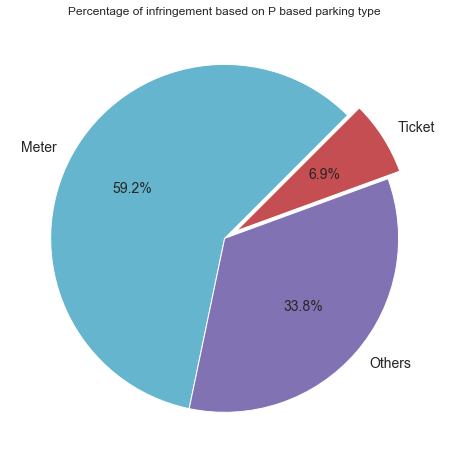

In [39]:
#Creating a pie chart based on which type of parking had more infringements

plt.figure(figsize=(10,8))
plt.pie(pSignInfringe['Parking Type'].value_counts(), labels = pSignInfringe['Parking Type'].unique(), colors = ('c', 'm', 'r'), startangle = 45, autopct = "%1.1f%%", explode = (0,0,0.08), textprops={'fontsize': 14})
plt.title("Percentage of infringement based on P based parking type")
plt.show()

### Streets with the highest amount (Perecentage) of violiations in a  given time period (every 4 Hours)

In [40]:
mostInfring = parkingdata[parkingdata['In Violation?'] == 1]
mostInfring.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7021S,2012-08-24 11:34:36,2012-08-24 12:49:09,4473,LZ 15M M-SAT 7:30-19:30,1,1346,3770
8,CITY SQUARE,FLINDERS STREET,SWANSTON STREET,RUSSELL STREET,3,1630N,2012-05-19 18:20:01,2012-05-19 19:19:58,3597,1/2P MTR SAT 7:30-1930,1,670,1123
10,CHINATOWN,RUSSELL STREET,LT BOURKE STREET,BOURKE STREET,2,770E,2012-02-25 18:30:31,2012-02-25 21:02:36,9125,2P DIS M-SUN 0:00-23:59,1,1221,504
11,PRINCES THEATRE,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,1,C2858,2011-11-17 09:00:00,2011-11-17 10:41:06,6066,1P MTR M-SAT 7:30-19:30,1,894,1996
13,CHINATOWN,LT COLLINS STREET,SWANSTON STREET,RUSSELL STREET,4,2189S,2012-01-29 12:26:29,2012-01-29 12:28:16,107,S/ NO STOP CCV M-SUN 0:00-23:59,1,911,1181
15,SOUTHBANK,COVENTRY STREET,DODDS STREET,WELLS STREET,4,9317S,2012-02-20 13:50:40,2012-02-20 16:33:33,9773,2P TKT A M-F 7:30-18:30,1,547,4054
23,QUEENSBERRY,QUEENSBERRY STREET,ERROL STREET,LEVESON STREET,4,7733S,2012-07-24 11:56:34,2012-07-24 15:10:10,11616,LZ 30M M-F 7:30-18:30,1,1175,4420
28,QUEENSBERRY,VICTORIA STREET,KING STREET,HAWKE STREET,3,7642N,2012-02-15 11:32:34,2012-02-15 12:09:35,2221,1/4P M-SAT 7:30-18:30,1,1381,4001
30,RIALTO,COLLINS STREET,KING STREET,WILLIAM STREET,3,2066N,2012-09-03 09:24:51,2012-09-03 10:45:41,4850,1/2P M-SAT 7:30-19:30,1,528,1290
45,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6628,2011-11-11 17:42:32,2011-11-11 19:50:44,7692,2P MTR M-SAT 7:30-20:30,1,681,2812


In [41]:
# mask = (mostInfring['Arrival Time'].dt.hour >= 0) & (mostInfring['Arrival Time'].dt.hour <= 3)
# timeRange = mostInfring.loc[mask]
# mostInfringed = timeRange['Street Name'].value_counts(normalize = True)*100
# mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

# visulization = mostInfringedSorted.T.plot(kind = 'bar')
# visulization.set_title('Top 10 streets with the most violations between 12AM and 3:59AM')
# visulization.set_xlabel('Street Name')
# visulization.set_ylabel('Percentage of violations in time frame')
# add_value_labels(visulization)

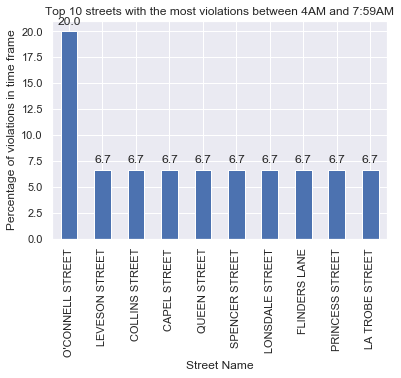

In [42]:
mask = (mostInfring['Arrival Time'].dt.hour >= 4) & (mostInfring['Arrival Time'].dt.hour <= 7)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Street Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 streets with the most violations between 4AM and 7:59AM')
visulization.set_xlabel('Street Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

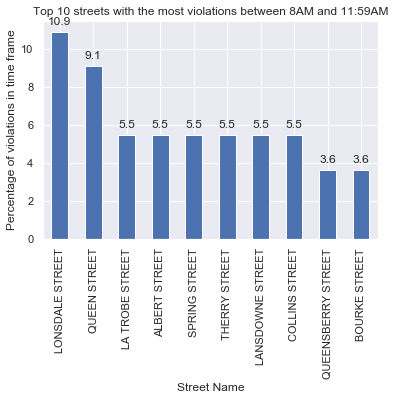

In [43]:
mask = (mostInfring['Arrival Time'].dt.hour >= 8) & (mostInfring['Arrival Time'].dt.hour <= 11)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Street Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 streets with the most violations between 8AM and 11:59AM')
visulization.set_xlabel('Street Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

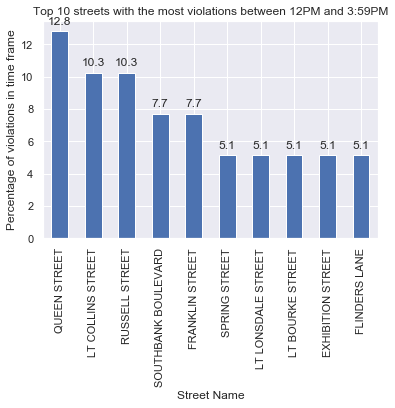

In [44]:
mask = (mostInfring['Arrival Time'].dt.hour >= 12) & (mostInfring['Arrival Time'].dt.hour <= 15)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Street Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 streets with the most violations between 12PM and 3:59PM')
visulization.set_xlabel('Street Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

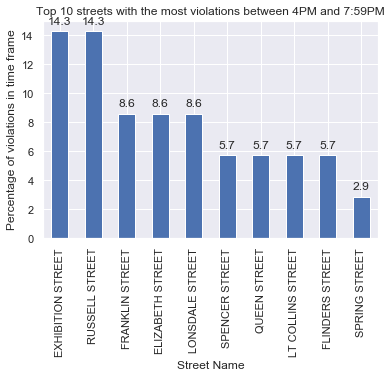

In [45]:
mask = (mostInfring['Arrival Time'].dt.hour >= 16) & (mostInfring['Arrival Time'].dt.hour <= 19)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Street Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 streets with the most violations between 4PM and 7:59PM')
visulization.set_xlabel('Street Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

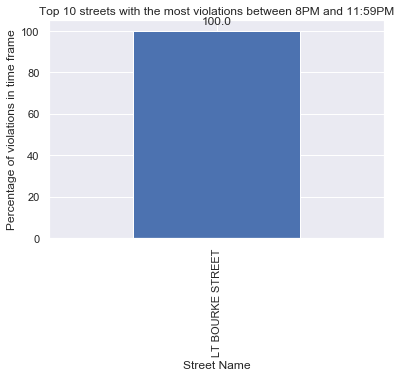

In [46]:
mask = (mostInfring['Arrival Time'].dt.hour >= 20) & (mostInfring['Arrival Time'].dt.hour <= 20)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Street Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 streets with the most violations between 8PM and 11:59PM')
visulization.set_xlabel('Street Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

### Areas with the highest amount (Perecentage) of violiations in a  given time period (every 4 Hours)

In [47]:
# mask = (mostInfring['Arrival Time'].dt.hour >= 0) & (mostInfring['Arrival Time'].dt.hour <= 3)
# timeRange = mostInfring.loc[mask]
# mostInfringed = timeRange['Area Name'].value_counts(normalize = True)*100
# mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

# visulization = mostInfringedSorted.T.plot(kind = 'bar')
# visulization.set_title('Top 10 areas with the most violations between 12AM and 3:59AM')
# visulization.set_xlabel('Area Name')
# visulization.set_ylabel('Percentage of violations in time frame')
# add_value_labels(visulization)

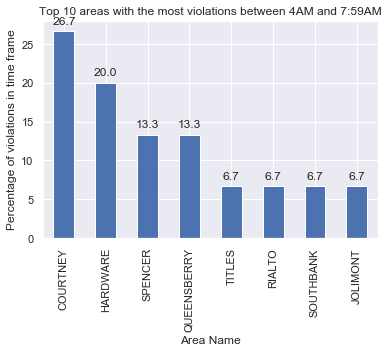

In [48]:
mask = (mostInfring['Arrival Time'].dt.hour >= 4) & (mostInfring['Arrival Time'].dt.hour <= 7)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Area Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 areas with the most violations between 4AM and 7:59AM')
visulization.set_xlabel('Area Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

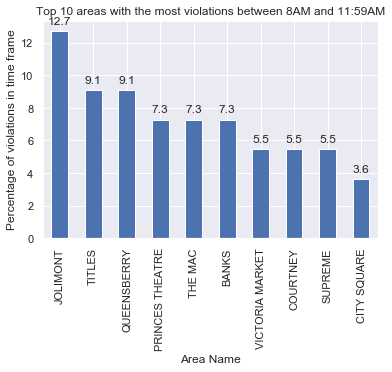

In [49]:
mask = (mostInfring['Arrival Time'].dt.hour >= 8) & (mostInfring['Arrival Time'].dt.hour <= 11)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Area Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 areas with the most violations between 8AM and 11:59AM')
visulization.set_xlabel('Area Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

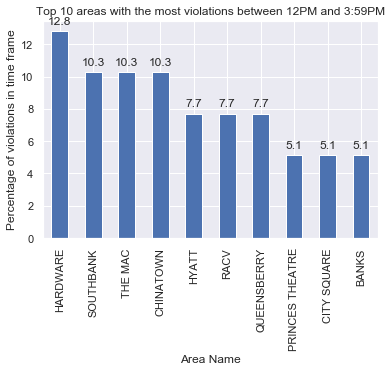

In [50]:
mask = (mostInfring['Arrival Time'].dt.hour >= 12) & (mostInfring['Arrival Time'].dt.hour <= 15)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Area Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 areas with the most violations between 12PM and 3:59PM')
visulization.set_xlabel('Area Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

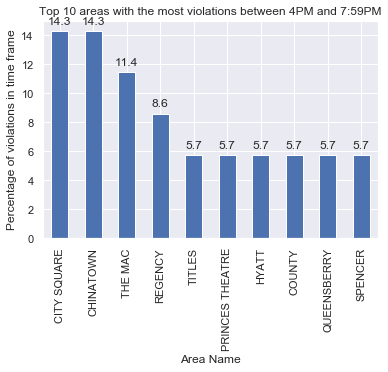

In [51]:
mask = (mostInfring['Arrival Time'].dt.hour >= 16) & (mostInfring['Arrival Time'].dt.hour <= 19)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Area Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 areas with the most violations between 4PM and 7:59PM')
visulization.set_xlabel('Area Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

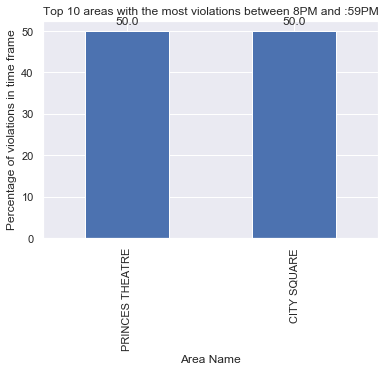

In [52]:
mask = (mostInfring['Arrival Time'].dt.hour >= 20) & (mostInfring['Arrival Time'].dt.hour <= 23)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Area Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 areas with the most violations between 8PM and :59PM')
visulization.set_xlabel('Area Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

## What is the busiest hour for each area

In [53]:
Bhour = parkingdata
Bhour['Arrival Time'] = pd.DatetimeIndex(Bhour['Arrival Time'])
Bhour.set_index(keys='Arrival Time', inplace=True)

In [54]:
start = datetime.time(0,0,0)
end = datetime.time(3,59,59)
Bhour0 = Bhour.between_time(start,end)
Bhour0

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
Arrival Time,,,,,,,,,,,,
2012-11-02 00:01:20,BANKS,FLINDERS LANE,QUEEN STREET,ELIZABETH STREET,4,1785S,2012-11-02 00:44:20,2580,2P DIS M-SUN 0:00-23:59,0,669,1472
2011-11-16 03:40:29,SOUTHBANK,BALSTON STREET,CITY ROAD,KAVANAGH STREET,3,9076N,2011-11-16 03:45:42,313,LZ 15M M-SUN 0:00-23:59,0,60,4073
2011-10-20 01:18:50,CITY SQUARE,FLINDERS LANE,SWANSTON STREET,RUSSELL STREET,4,1765S,2011-10-20 01:20:03,73,P10 M-SUN 0:00-23:59,0,669,1432


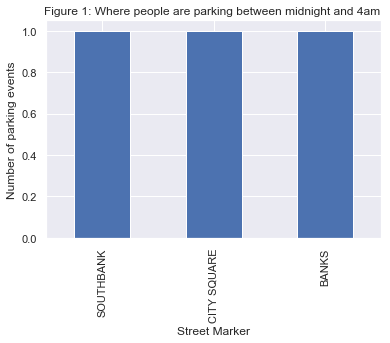

In [55]:
bplot = Bhour0['Area Name'].value_counts()
bplot.plot(kind = 'bar')
plt.title('Figure 1: Where people are parking between midnight and 4am ')
plt.xlabel('Street Marker')
plt.ylabel('Number of parking events')
plt.show()

In [56]:
start = datetime.time(4,0,0)
end = datetime.time(7,59,59)
Bhour1 = Bhour.between_time(start,end)
Bhour1

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
Arrival Time,,,,,,,,,,,,
2012-02-25 07:37:40,SPENCER,COLLINS STREET,SPENCER STREET,KING STREET,4,2083S,2012-02-25 07:41:08,208,1P MTR M-SAT 7:30-19:30,0,528,5058
2012-08-17 07:30:07,JOLIMONT,GISBORNE STREET,ALBERT STREET,CATHEDRAL PLACE,2,11768E,2012-08-17 09:37:24,7637,2P TKT A M-F 7:30-18:30,1,706,6576
2012-08-15 07:30:48,SOUTHBANK,DORCAS STREET,WELLS STREET,ST KILDA ROAD,3,9118N,2012-08-15 07:35:12,264,2P MTR M-F 7:30-18:30,0,597,4549
2012-07-31 06:21:42,THE MAC,LA TROBE STREET,SWANSTON STREET,RUSSELL STREET,4,3737S,2012-07-31 06:23:04,82,2P DIS AOT 0:00-7:00,0,856,4949
2011-07-10 07:30:08,QUEENSBERRY,CAPEL STREET,QUEENSBERRY STREET,VICTORIA STREET,2,5722E,2011-07-10 08:22:04,3116,LZ 30M M-F 7:30-18:30,1,163,2444
2012-06-04 07:30:08,HARDWARE,QUEEN STREET,LT BOURKE STREET,BOURKE STREET,1,C1128,2012-06-04 08:11:44,2496,1P MTR M-SAT 7:30-19:30,0,1171,5365
2012-02-27 07:30:07,COURTNEY,O'CONNELL STREET,COBDEN STREET,VICTORIA STREET,2,5086E,2012-02-27 09:57:40,8853,1/2P M-F 7:30-18:30,1,1062,4004
2011-11-30 07:30:08,SOUTHBANK,COVENTRY STREET,WELLS STREET,ST KILDA ROAD,3,9294N,2011-11-30 07:40:56,648,P/15 M-F 7:30-9:00,0,547,4071
2012-09-27 07:35:45,REGENCY,LA TROBE STREET,RUSSELL STREET,EXHIBITION STREET,3,3660N,2012-09-27 07:37:31,106,3P MTR M-F 7:30-16:00,0,856,2657


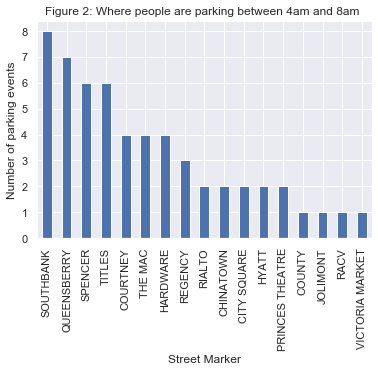

In [57]:
bplot = Bhour1['Area Name'].value_counts()
bplot.plot(kind = 'bar')
plt.title('Figure 2: Where people are parking between 4am and 8am ')
plt.xlabel('Street Marker')
plt.ylabel('Number of parking events')
plt.show()

In [58]:
start = datetime.time(8,0,0)
end = datetime.time(11,59,59)
Bhour2 = Bhour.between_time(start,end)
Bhour2

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
Arrival Time,,,,,,,,,,,,
2012-08-24 11:34:36,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7021S,2012-08-24 12:49:09,4473,LZ 15M M-SAT 7:30-19:30,1,1346,3770
2011-11-11 09:56:45,BANKS,QUEEN STREET,FLINDERS LANE,FLINDERS STREET,2,994E,2011-11-11 10:28:25,1900,1P MTR M-F 7:30-16:30,0,1171,688
2011-11-17 09:00:00,PRINCES THEATRE,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,1,C2858,2011-11-17 10:41:06,6066,1P MTR M-SAT 7:30-19:30,1,894,1996
2012-06-20 09:50:46,RACV,QUEEN STREET,BOURKE STREET,LT COLLINS STREET,2,1110E,2012-06-20 09:57:05,379,1/2P MTR M-F 7:30-16:30,0,1171,692
2012-08-05 11:33:28,COURTNEY,ELIZABETH STREET,QUEENSBERRY STREET,VICTORIA STREET,2,4628E,2012-08-05 12:05:42,1934,1P TKT A M-SAT 7:30-18:30,0,627,5966
2012-07-24 11:56:34,QUEENSBERRY,QUEENSBERRY STREET,ERROL STREET,LEVESON STREET,4,7733S,2012-07-24 15:10:10,11616,LZ 30M M-F 7:30-18:30,1,1175,4420
2011-12-10 09:54:35,THE MAC,A'BECKETT STREET,ELIZABETH STREET,SWANSTON STREET,4,5983S,2011-12-10 09:58:19,224,1P MTR M-SAT 7:30-19:30,0,5,2593
2011-10-11 09:24:04,QUEENSBERRY,HOWARD STREET,QUEENSBERRY STREET,VICTORIA STREET,1,C5964,2011-10-11 11:57:57,9233,4P MTR M-F 7:30-18:30,0,798,3522
2012-02-20 10:48:22,REGENCY,SPRING STREET,VICTORIA PARADE,LT LONSDALE STREET,1,C192,2012-02-20 11:25:08,2206,2P MTR M-SAT 7:30-20:30,0,1288,128


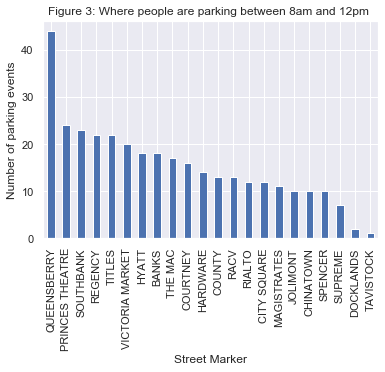

In [59]:
bplot = Bhour2['Area Name'].value_counts()
bplot.plot(kind = 'bar')
plt.title('Figure 3: Where people are parking between 8am and 12pm ')
plt.xlabel('Street Marker')
plt.ylabel('Number of parking events')
plt.show()

In [60]:
start = datetime.time(12,0,0)
end = datetime.time(15,59,59)
Bhour3 = Bhour.between_time(start,end)
Bhour3

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
Arrival Time,,,,,,,,,,,,
2012-03-17 13:07:59,COURTNEY,PEEL STREET,O'CONNELL STREET,QUEENSBERRY STREET,2,5398E,2012-03-17 13:10:06,127,1/2P A RPE M-SUN 7:30-23:00,0,1101,3472
2012-02-17 13:54:34,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6624,2012-02-17 14:20:17,1543,2P MTR M-SAT 7:30-20:30,0,681,2805
2011-11-27 15:03:19,CHINATOWN,LONSDALE STREET,SWANSTON STREET,RUSSELL STREET,3,2888N,2011-11-27 16:02:41,3562,1P SUN 7:30-18:30,0,894,1770
2012-04-21 15:08:32,SOUTHBANK,GRANT STREET,WELLS STREET,ST KILDA ROAD,3,9870N,2012-04-21 17:06:00,7048,2P TKT A M-SAT 7:30-18:30,0,728,4584
2012-03-03 14:36:14,THE MAC,LA TROBE STREET,ELIZABETH STREET,SWANSTON STREET,3,3776N,2012-03-03 14:47:28,674,1/2P TKT A SAT 7:30-19:30,0,856,1520
2012-08-25 14:28:47,HYATT,EXHIBITION STREET,LT COLLINS STREET,COLLINS STREET,1,C376,2012-08-25 15:02:01,1994,1P MTR M-SAT 7:30-19:30,0,647,258
2012-01-29 12:26:29,CHINATOWN,LT COLLINS STREET,SWANSTON STREET,RUSSELL STREET,4,2189S,2012-01-29 12:28:16,107,S/ NO STOP CCV M-SUN 0:00-23:59,1,911,1181
2012-02-20 13:50:40,SOUTHBANK,COVENTRY STREET,DODDS STREET,WELLS STREET,4,9317S,2012-02-20 16:33:33,9773,2P TKT A M-F 7:30-18:30,1,547,4054
2012-09-14 13:57:41,TITLES,LA TROBE STREET,QUEEN STREET,ELIZABETH STREET,3,3836N,2012-09-14 14:05:46,485,1P TKT A M-F 7:30-16:00,0,856,5098


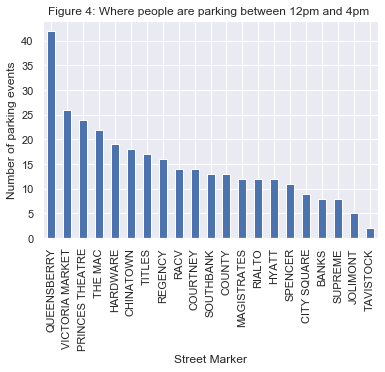

In [61]:
bplot = Bhour3['Area Name'].value_counts()
bplot.plot(kind = 'bar')
plt.title('Figure 4: Where people are parking between 12pm and 4pm ')
plt.xlabel('Street Marker')
plt.ylabel('Number of parking events')
plt.show()

In [62]:
start = datetime.time(16,0,0)
end = datetime.time(19,59,59)
Bhour4 = Bhour.between_time(start,end)
Bhour4

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
Arrival Time,,,,,,,,,,,,
2011-07-12 19:50:33,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6578,2011-07-12 19:53:26,173,2P MTR M-SAT 7:30-20:30,0,681,2804
2012-05-19 18:20:01,CITY SQUARE,FLINDERS STREET,SWANSTON STREET,RUSSELL STREET,3,1630N,2012-05-19 19:19:58,3597,1/2P MTR SAT 7:30-1930,1,670,1123
2012-02-25 18:30:31,CHINATOWN,RUSSELL STREET,LT BOURKE STREET,BOURKE STREET,2,770E,2012-02-25 21:02:36,9125,2P DIS M-SUN 0:00-23:59,1,1221,504
2012-06-20 16:32:54,SOUTHBANK,DORCAS STREET,WELLS STREET,ST KILDA ROAD,3,9116N,2012-06-20 16:51:50,1136,P/ 15 M-SUN 00:00-23:59,0,597,6066
2012-12-01 18:51:31,PRINCES THEATRE,BOURKE STREET,EXHIBITION STREET,SPRING STREET,4,2345S,2012-12-01 18:53:27,116,1P MTR M-SAT 7:30-19:30,0,123,1456
2012-11-07 19:51:26,BANKS,FLINDERS STREET,QUEEN STREET,ELIZABETH STREET,4,1581S,2012-11-07 19:56:12,286,2P MTR M-F 16:30-20:30,0,670,1173
2012-09-21 16:38:18,THE MAC,FRANKLIN STREET,ELIZABETH STREET,SWANSTON STREET,1,C6534,2012-09-21 17:28:27,3009,1P MTR M-SAT 7:30-19:30,0,681,7686
2011-04-12 17:50:52,TITLES,A'BECKETT STREET,QUEEN STREET,ELIZABETH STREET,4,6003S,2011-04-12 18:14:48,1436,2P SUN 7:30-18:30,0,5,2589
2012-08-17 17:38:21,TITLES,LA TROBE STREET,QUEEN STREET,ELIZABETH STREET,4,3835S,2012-08-17 18:02:13,1432,1P MTR M-F 9:30-19:30,0,856,2197


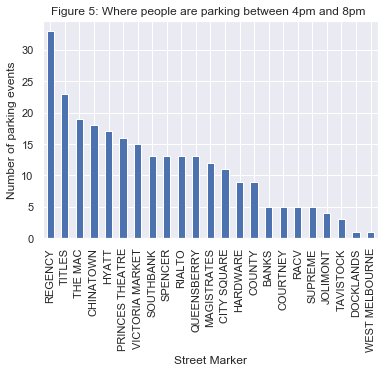

In [63]:
bplot = Bhour4['Area Name'].value_counts()
bplot.plot(kind = 'bar')
plt.title('Figure 5: Where people are parking between 4pm and 8pm ')
plt.xlabel('Street Marker')
plt.ylabel('Number of parking events')
plt.show()

In [64]:
start = datetime.time(20,0,0)
end = datetime.time(23,59,59)
Bhour5 = Bhour.between_time(start,end)
Bhour5

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
Arrival Time,,,,,,,,,,,,
2012-06-16 20:25:43,TITLES,QUEEN STREET,A'BECKETT STREET,LA TROBE STREET,1,C4834,2012-06-16 20:30:00,257,2P MTR M-SAT 19:30-20:30,0,1171,5262
2012-07-23 20:27:45,RACV,BOURKE STREET,WILLIAM STREET,QUEEN STREET,3,2416N,2012-07-23 20:30:00,135,P MTR M-SAT 19:30-20:30,0,123,1342
2012-09-15 20:27:27,TAVISTOCK,COLLINS STREET,WILLIAM STREET,QUEEN STREET,4,2009S,2012-09-15 20:30:00,153,P MTR M-SAT 19:30-20:30,0,528,5056
2011-10-13 20:08:42,MAGISTRATES,LT LONSDALE STREET,SPENCER STREET,KING STREET,3,3574N,2011-10-13 20:30:00,1278,2P MTR M-SAT 7:30-20:30,0,926,1549
2012-06-04 20:29:05,THE MAC,ELIZABETH STREET,FRANKLIN STREET,A'BECKETT STREET,2,4392E,2012-06-04 20:30:00,55,P MTR M-SAT 19:30-20:30,0,627,3385
2012-06-18 21:00:43,HARDWARE,LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,3,2952N,2012-06-18 21:02:14,91,2P DIS AOT 18:30-23:59,0,894,1832
2011-12-23 23:01:45,CITY SQUARE,RUSSELL STREET,COLLINS STREET,FLINDERS LANE,1,C656,2011-12-23 23:03:03,78,S/ NO STOP AOT 22:00-23:59,1,1221,476
2012-03-20 22:59:38,QUEENSBERRY,ERROL STREET,QUEENSBERRY STREET,VICTORIA STREET,2,10174E,2012-03-20 23:03:13,215,LZ 30M M-SUN 00:00-23:59,0,641,3215
2011-10-31 20:00:20,THE MAC,SWANSTON STREET,FRANKLIN STREET,LA TROBE STREET,5,4621W,2011-10-31 20:02:52,152,P MTR M-SAT 19:30-20:30,0,1329,3550


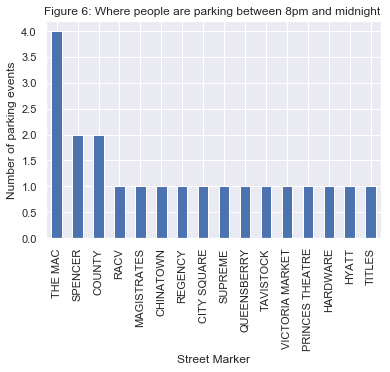

In [65]:
bplot = Bhour5['Area Name'].value_counts()
bplot.plot(kind = 'bar')
plt.title('Figure 6: Where people are parking between 8pm and midnight ')
plt.xlabel('Street Marker')
plt.ylabel('Number of parking events')
plt.show()